# The Reuters corpus

### Authors: Siboney Cardoso and Kristen Lowe

In [6]:
#QUESTION: can predict an author's sentiment based on their writing style 
#and then use that to predict other authors' sentiments—we can break down 
#the results and the process

In [72]:
import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import string
from nltk.stem import PorterStemmer

nltk.download('punkt') # for tokenizing

[nltk_data] Downloading package punkt to C:\Users\Siboney
[nltk_data]     Cardoso\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [73]:
def read_data_from_directory(directory_path):
    authors = os.listdir(directory_path)
    texts = []
    labels = []
    for author in authors:
        author_path = os.path.join(directory_path, author)
        for file_name in os.listdir(author_path):
            file_path = os.path.join(author_path, file_name)
            with open(file_path, 'r', encoding='utf-8') as f:
                texts.append(f.read())
                labels.append(author)
    return texts, labels
# Reading the training and test data
test_texts, test_labels = read_data_from_directory("data/ReutersC50/C50test")
train_texts, train_labels = read_data_from_directory("data/ReutersC50/C50train")

In [74]:
#RUN ANALYSIS TO UNDERSTAND DATASET

In [75]:
word_tokenize(train_texts[0])

['The',
 'Internet',
 'may',
 'be',
 'overflowing',
 'with',
 'new',
 'technology',
 'but',
 'crime',
 'in',
 'cyberspace',
 'is',
 'still',
 'of',
 'the',
 'old-fashioned',
 'variety',
 '.',
 'The',
 'National',
 'Consumers',
 'League',
 'said',
 'Wednesday',
 'that',
 'the',
 'most',
 'popular',
 'scam',
 'on',
 'the',
 'Internet',
 'was',
 'the',
 'pyramid',
 'scheme',
 ',',
 'in',
 'which',
 'early',
 'investors',
 'in',
 'a',
 'bogus',
 'fund',
 'are',
 'paid',
 'off',
 'with',
 'deposits',
 'of',
 'later',
 'investors',
 '.',
 'The',
 'league',
 ',',
 'a',
 'non-profit',
 'consumer',
 'advocacy',
 'group',
 ',',
 'tracks',
 'web',
 'scams',
 'through',
 'a',
 'site',
 'it',
 'set',
 'up',
 'on',
 'the',
 'world',
 'wide',
 'web',
 'in',
 'February',
 'called',
 'Internet',
 'Fraud',
 'Watch',
 'at',
 'http',
 ':',
 '//www.fraud.org',
 '.',
 'The',
 'site',
 ',',
 'which',
 'collects',
 'reports',
 'directly',
 'from',
 'consumers',
 ',',
 'has',
 'been',
 'widely',
 'praised',
 '

In [76]:
# Helper function to tokenize, remove punctuation, and stem
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(text.lower())
    
    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation and token not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    
    return stemmed_tokens

[nltk_data] Downloading package stopwords to C:\Users\Siboney
[nltk_data]     Cardoso\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [77]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Basic Statistics
print(f"Total number of training documents: {len(train_texts)}")
print(f"Total number of test documents: {len(test_texts)}")

train_doc_lengths = [len(preprocess_text(text)) for text in train_texts]
test_doc_lengths = [len(preprocess_text(text)) for text in test_texts]

print(f"\nAverage document length in training set: {np.mean(train_doc_lengths)} words")
print(f"Minimum document length in training set: {np.min(train_doc_lengths)} words")
print(f"Maximum document length in training set: {np.max(train_doc_lengths)} words")
print(f"\nAverage document length in test set: {np.mean(test_doc_lengths)} words")
print(f"Minimum document length in test set: {np.min(test_doc_lengths)} words")
print(f"Maximum document length in test set: {np.max(test_doc_lengths)} words")

Total number of training documents: 2500
Total number of test documents: 2500

Average document length in training set: 328.4308 words
Minimum document length in training set: 33 words
Maximum document length in training set: 957 words

Average document length in test set: 333.2564 words
Minimum document length in test set: 42 words
Maximum document length in test set: 934 words


In [78]:
# The CountVectorizer will now use my custom tokenizer/preprocesser
vectorizer = CountVectorizer(tokenizer=preprocess_text, stop_words='english', max_features=2500)
train_dtm = vectorizer.fit_transform(train_texts)
test_dtm = vectorizer.transform(test_texts)

C:\Users\Siboney Cardoso\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\Siboney Cardoso\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'thu', 'togeth', 'twelv', 'twenti', 'whatev', 'whenc', 

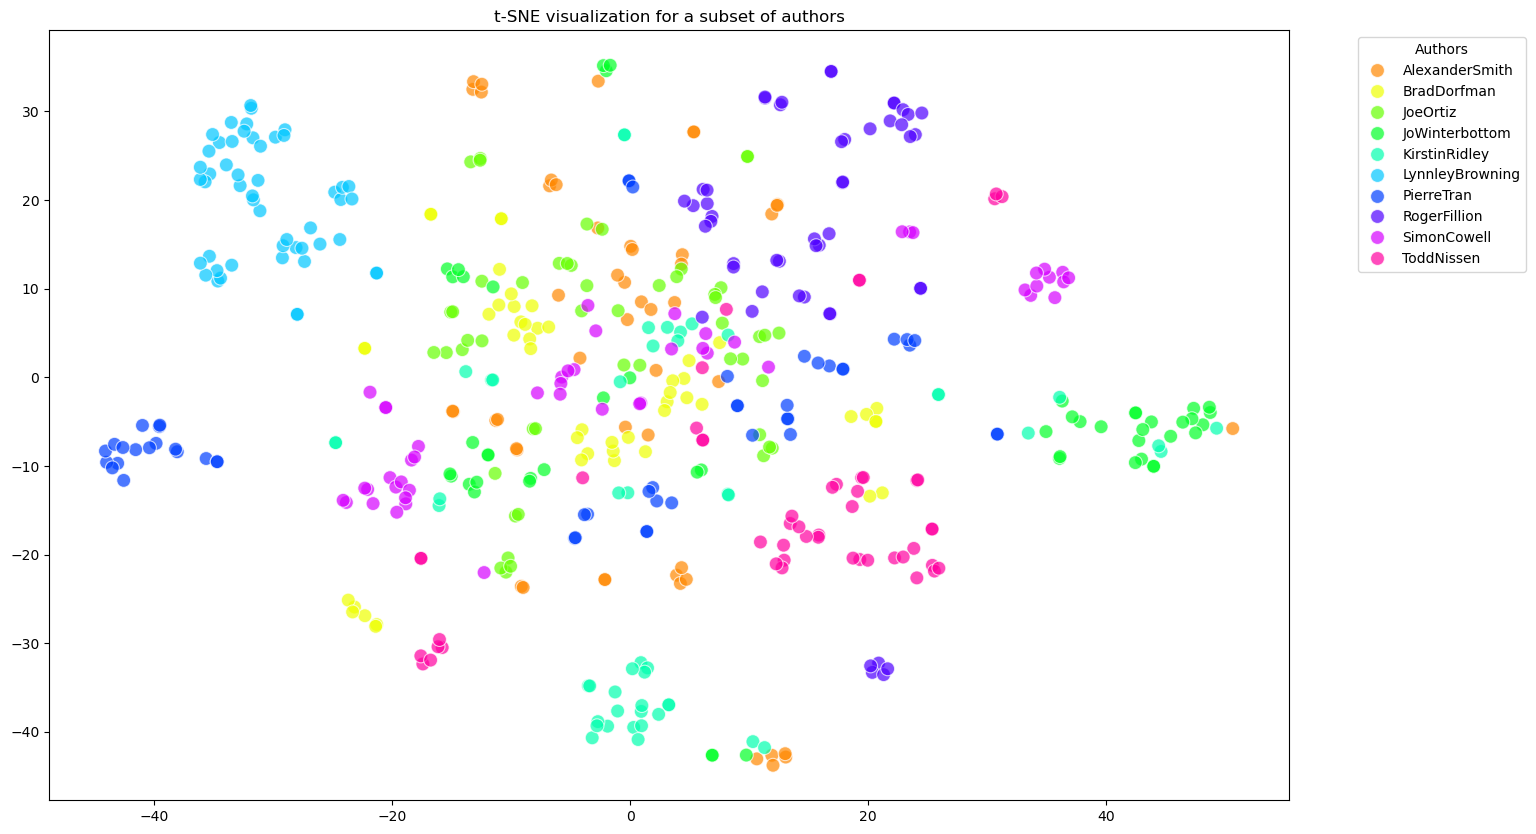

In [79]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import random

# 1. Choose a subset of 10 authors
unique_authors = list(set(train_labels))
selected_authors = random.sample(unique_authors, 10)

# 2. Filter the training data
filtered_indices = [i for i, label in enumerate(train_labels) if label in selected_authors]
filtered_texts = [train_texts[i] for i in filtered_indices]
filtered_labels = [train_labels[i] for i in filtered_indices]
filtered_dtm = train_dtm[filtered_indices]

# 3. PCA and t-SNE
pca = PCA(n_components=100)
reduced_data_pca = pca.fit_transform(filtered_dtm.toarray())  # Convert sparse matrix to dense matrix
tsne = TSNE(n_components=2, perplexity=20)
tsne_results = tsne.fit_transform(reduced_data_pca)

# 4. Plotting
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x=tsne_results[:, 0], y=tsne_results[:, 1],
    hue=filtered_labels,
    palette=sns.color_palette("hsv", len(selected_authors)),
    alpha=0.7,
    s=100
)
plt.title('t-SNE visualization for a subset of authors')
plt.legend(title='Authors', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [80]:
#Begin Building predicting model to answer question

In [81]:
#Import the libraries needed

import os
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

nltk.download('vader_lexicon')
nltk.download('punkt')

# Function to read the data
def read_data_from_directory(directory_path):
    authors = os.listdir(directory_path)
    texts = []
    labels = []
    for author in authors:
        author_path = os.path.join(directory_path, author)
        for file_name in os.listdir(author_path):
            file_path = os.path.join(author_path, file_name)
            with open(file_path, 'r', encoding='utf-8') as f:
                texts.append(f.read())
                labels.append(author)
    return texts, labels

# Reading the training and test data
train_texts, train_labels = read_data_from_directory("C:/Users/Siboney Cardoso/OneDrive/STA380/ReutersC50/C50train")


[nltk_data] Downloading package vader_lexicon to C:\Users\Siboney
[nltk_data]     Cardoso\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Siboney
[nltk_data]     Cardoso\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [82]:
#Begin SENTIMENT ANALYSIS

import pandas as pd

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    return sia.polarity_scores(text)

# Sentiment scores for each document in the training set
train_sentiments = [get_sentiment_scores(text) for text in train_texts]

# Sentiment scores by author

from collections import defaultdict
author_sentiments = defaultdict(lambda: {'neg': 0, 'neu': 0, 'pos': 0, 'compound': 0, 'count': 0})

for label, sentiment in zip(train_labels, train_sentiments): #his loop aggregates the sentiment scores for each author
    author_sentiments[label]['neg'] += sentiment['neg']
    author_sentiments[label]['neu'] += sentiment['neu']
    author_sentiments[label]['pos'] += sentiment['pos']
    author_sentiments[label]['compound'] += sentiment['compound']
    author_sentiments[label]['count'] += 1

# Calculate average sentiment scores per author
for author in author_sentiments:
    for key in ['neg', 'neu', 'pos', 'compound']:
        author_sentiments[author][key] /= author_sentiments[author]['count']

#to see the overall sentiment profile of each author's writing style.

import pandas as pd

# Convert the author_sentiments dictionary to a DataFrame
sentiments_df = pd.DataFrame.from_dict(author_sentiments, orient='index')

# Reset the index to turn the author names into a column
sentiments_df.reset_index(inplace=True)

# Rename the columns for better readability
sentiments_df.rename(columns={'index': 'Author', 'neg': 'Negative', 'neu': 'Neutral', 'pos': 'Positive', 'compound': 'Compound'}, inplace=True)

# Sort the DataFrame by the 'Compound' column in ascending order
sentiments_df_sorted = sentiments_df.sort_values(by='Compound', ascending=True)

# Display the sorted DataFrame
sentiments_df_sorted



,Author,Negative,Neutral,Positive,Compound,count
20,KarlPenhaul,0.12494,0.80574,0.06918,-0.518354,50
3,BenjaminKangLim,0.10184,0.82906,0.06892,-0.509770,50
27,LynneO'Donnell,0.05576,0.89834,0.04586,-0.192512,50
43,ScottHillis,0.07804,0.83540,0.08662,0.075272,50
40,RogerFillion,0.05624,0.88006,0.06368,0.127204,50
14,JanLopatka,0.06054,0.86842,0.07100,0.187802,50
10,FumikoFujisaki,0.08558,0.81322,0.10134,0.192316,50
33,MichaelConnor,0.04770,0.88606,0.06628,0.220514,50
34,MureDickie,0.07968,0.82376,0.09660,0.235558,50
32,MatthewBunce,0.05268,0.88996,0.05732,0.248250,50


In [83]:
# Now, let's use these average sentiment scores as features for classification

In [84]:

# Convert text data to numeric features using CountVectorizer
vectorizer = CountVectorizer(max_features=2500)
train_dtm = vectorizer.fit_transform(train_texts)

# Create a feature matrix including both text features and sentiment scores
import numpy as np
from scipy.sparse import hstack

# Convert the sentiment dictionary to a matrix
author_sentiment_matrix = np.array([[author_sentiments[author]['neg'], 
                                     author_sentiments[author]['neu'], 
                                     author_sentiments[author]['pos'], 
                                     author_sentiments[author]['compound']] for author in train_labels])

# Stack the sentiment features with the document-term matrix
train_features = hstack([train_dtm, author_sentiment_matrix])

# Train a classification model to predict authorship
X_train, X_test, y_train, y_test = train_test_split(train_features, train_labels, test_size=0.2, random_state=42)
#(80% training, 20% testing).
clf = RandomForestClassifier(n_estimators=100, random_state=42) #Random Forest classifier with 100 trees.
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


                   precision    recall  f1-score   support

    AaronPressman       0.83      0.83      0.83         6
       AlanCrosby       1.00      1.00      1.00        10
   AlexanderSmith       0.88      1.00      0.93         7
  BenjaminKangLim       0.85      1.00      0.92        11
    BernardHickey       1.00      1.00      1.00        14
      BradDorfman       1.00      0.91      0.95        11
 DarrenSchuettler       0.71      1.00      0.83         5
      DavidLawder       1.00      1.00      1.00         6
    EdnaFernandes       1.00      0.81      0.90        16
      EricAuchard       0.93      0.93      0.93        14
   FumikoFujisaki       0.77      1.00      0.87        10
   GrahamEarnshaw       1.00      1.00      1.00         8
 HeatherScoffield       1.00      0.91      0.95        11
       JanLopatka       0.83      1.00      0.91         5
    JaneMacartney       0.80      0.80      0.80        10
     JimGilchrist       1.00      1.00      1.00       